# System Description
In this example, we simulate a magnetic levitation system (in 2D), as illustrated in the figure.

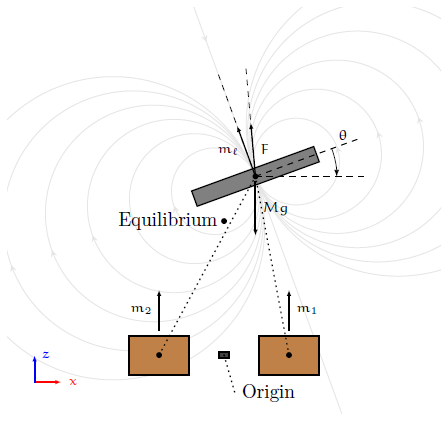

The system consists of one levitating disk magnet that is free to rotate and move in space given the force it feels from two permanent/electromagnets placed below it. Our goal is to use the sensor measurements of the magnetic field in the origin to control the current in the electromagnets so that the levitating magnet actually levitates.

Given a state vector  

$$
\zeta = [x, z, \theta, \dot{x}, \dot{z}, \dot{\theta}]^\top,
$$

where:
- $(x,z)$ is the **position** of the levitating magnet,
- $(\dot{x},\dot{z})$ is the **velocity** of the levitating magnet,
- $\theta$ is the **angle** of the magnet w.r.t. the plane (CW),
- $\dot{\theta}$ is the **angular velocity** of the magnet,  

this system can be described by the following ordinary differential equations:

$$
\begin{aligned}
\begin{bmatrix}
\ddot{x}\\
\ddot{z}
\end{bmatrix}
&= \frac{1}{M}\sum_{i=1}^{n_u} \mathbf{F}_{i} + \mathbf{g},\\
%
\ddot{\theta} &= \frac{1}{J}\sum_{i=1}^{n_u}\tau_{i},
\end{aligned}
$$

where

$$
\begin{aligned}
\mathbf{F}_{i} &= \frac{3 \mu_0}{4 \pi d_i^5}\Biggl[\left(\mathbf{m}_i \cdot \mathbf{d}_i\right) \mathbf{m}+\left(\mathbf{m} \cdot \mathbf{d}_i\right) \mathbf{m}_i+\left(\mathbf{m}_i \cdot \mathbf{m}\right) \mathbf{d}_i-\frac{5\left(\mathbf{m}_i \cdot \mathbf{d}_i\right)\left(\mathbf{m} \cdot \mathbf{d}_i\right)}{d_i^2} \mathbf{d}_i\Biggr],\\
%
\tau_{i} &= \frac{\mu_0}{4 \pi d_i^3} \left[\mathbf{m} \times\left(\frac{3\left(\mathbf{m}_i \cdot \mathbf{d}_i\right)\mathbf{d}_i}{d_i^2}-\mathbf{m}_i\right)\right].
\end{aligned}
$$

Here, we define the 2D cross product as
$$
\mathbf{a} \times \mathbf{b} := a_1 b_2 - a_2 b_1,
$$
and
$$
\mathbf{m} := m\begin{bmatrix}-\sin \theta \\ \cos \theta\end{bmatrix}, \quad \mathbf{m}_i := \begin{bmatrix}0 \\ m_i + kI_i\end{bmatrix},
$$
$$
\mathbf{d}_i := \mathbf{r} - \mathbf{r}_i, \quad d_i = \|\mathbf{d}_i\|.\quad \quad \quad
$$

Here:
- $m$ is the **magnitude of the magnetic moment** of the levitating magnet,
- $m_i$ is the **magnitude of the magnetic moment** of the supporting magnets,
- $M$ is the **mass** of the levitating magnet,
- $J$ is the **inertia** of the levitating magnet,
- $\mathbf{r}$ is the $(x,z)$ position of the levitating magnet,
- $\mathbf{r}_i$ is the $(x,z)$ position of the supporting magnets
- $g$ is the **gravitational acceleration**,
- $\mu_0$ is the **magnetic permeability of free space**
- $\mathbf{F}_i$ and $\mathbf{\tau}$ are the **force and torque** from the i'th magnet acting on the levitating magnet,
- $I_i$ is the **current** in the i'th solenoid/magnet

This system is naturally **unstable**, meaning that without control, the magnet will fall.

A magnetic sensor is also placed in the center of the based of the system, and its measurements can be modeled as
$$
    \mathbf{B}:= \frac{\mu_0}{4\pi r^3}\left[3\frac{(\mathbf{m}\cdot\mathbf{r})\mathbf{r}}{r^2}-\mathbf{m}\right].
$$

## Control Strategy
This system can be stabilized by a **Proportional-Derivative (PD) controller**.
Taking the measuremet in the x-direction, $y = B_x$, as output, and letting the currents be given by $I_1 = - I_2 = u$, where $u$ is our control input, we have a SISO system that ca be stabilized by defining

$$
u := K_p y + K_d \dot{y},
$$

where:
- $K_p$ is a **proportional gain**, which counteracts deviations from the equilibrium point, and
- $K_d$ is a **derivative gain**, which damps oscillations by reacting to the change in position.

By choosing appropriate values for $K_p$ and $K_d$, the controller ensures that the levitating magnet stays levitating.


# Simulation Example
The following is an implementation of a simulation with a PD controller for an instance of the maglev system.

In [1]:
# from ipysim.widgets import interactive_simulation

# interactive_simulation()

In [2]:
from ipysim.simulation_ui import interactive_simulation
from ipysim.simulations.simulate_maglev import simulate, plot_maglev, create_maglev_animation
from ipysim.params import default_params, default_state0

# Define a lambda that wraps the detailed animation function.
# Notice that we pass in the default initial state.
detailed_animation_fn = lambda t, sol: create_maglev_animation(t, sol, default_state0())

# Now, start the interactive simulation with the simulation function,
# the plotting function, and the detailed animation function.
interactive_simulation(
    simulate_fn=simulate,         # Simulation routine (takes in parameters, state, etc.)
    plot_fn=plot_maglev,          # A plotting routine for static plots
    animation_fn=detailed_animation_fn,  # Our detailed animation function from the simulation module
    params=default_params(),      # Default simulation parameters
    state0=default_state0(),       # Default initial state
    T=1.0,                       # Total simulation time in seconds
    dt=0.01                       # Time step
)



# Run the interactive simulation with evaluation
# interactive_simulation(
#     T=2.0,
#     Kp_default=430.0,
#     Kd_default=40.0,
#     evaluation_function=evaluation_check
# )

In [3]:
def evaluation_check(sol, t):
    # Extract raw z value from simulation output.
    if sol.ndim == 1:
        z_val_raw = sol[1]  # raw z value from a 1D state vector
    else:
        z_val_raw = sol[-1, 1]  # raw z from the last state in the time-series
    print("Final displayed z value:", z_val_raw)
    return 0.001 < z_val_raw < 0.5

sliders_config = {
    "Kp": {"default": 800.0, "min": 0.0, "max": 1000.0, "step": 10.0, "description": "Kp"},
    "Kd": {"default": 100.0, "min": 0.0, "max": 200.0, "step": 5.0, "description": "Kd"},
}

interactive_simulation(
    simulate_fn=simulate,
    plot_fn=plot_maglev,
    animation_fn=detailed_animation_fn,
    params=default_params(),
    state0=default_state0(),
    T=2.0,
    evaluation_function=evaluation_check,
    sliders_config=sliders_config
)


In [ ]:
from ipysim.simulations.simulate_maglev_with_noise import maglev_with_noise_simulation, plot_maglev_with_noise
from ipysim.simulation_ui import interactive_simulation
from ipysim.params import default_params, default_state0

# Optional: evaluation check function
def evaluation_check(sol, t):
    if sol.ndim == 1:
        z_val_raw = sol[1]
    else:
        z_val_raw = sol[-1, 1]
    print("Final displayed z value:", z_val_raw)
    return 0.001 < z_val_raw < 0.5

# Slider setup including the noise toggle
sliders_config = {
    "Kp": {"default": 800.0, "min": 0.0, "max": 1000.0, "step": 10.0, "description": "Kp"},
    "Kd": {"default": 100.0, "min": 0.0, "max": 200.0, "step": 5.0, "description": "Kd"},
    "init_x": {"default": 0.0, "min": -0.01, "max": 0.01, "step": 0.001, "description": "Initial x"},
    "init_z": {"default": 0.0443, "min": 0.01, "max": 0.1, "step": 0.001, "description": "Initial z"},
    "noise": {"default": False, "min": False, "max": True, "step": 1, "description": "Enable noise"},
}

# Run the simulation UI
interactive_simulation(
    simulate_fn=maglev_with_noise_simulation,
    plot_fn=plot_maglev_with_noise,
    params=default_params(),
    state0=default_state0(),
    T=5.0,
    dt=0.001,
    evaluation_function=evaluation_check,
    sliders_config=sliders_config
)
